<a href="https://colab.research.google.com/github/dealtron/Proyek-Akhir-Dicoding/blob/master/Proyek_Kedua_Membuat_Model_Machine_Learning_dengan_Data_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Kedua : Membuat Model Machine Learning dengan Data Time Series

Nama : Aditya Ramadhan Moesya

Machine Learning - IBM

Disini saya akan mengerjakan tugas kedua saya di Dicoding pada sertifikasi "Belajar Pengembangan Machine Learning".

# Kriteria Submission

Berikut kriteria submission yang harus saya penuhi:

* Dataset yang akan dipakai bebas, namun minimal memiliki 1000 sampel,

* Harus menggunakan LSTM dalam arsitektur model,

* Validation set sebesar 20% dari total dataset,

* Model harus menggunakan model sequential,

* Harus menggunakan Learning Rate pada Optimizer,

* MAE < 10% skala data.



# Code

## Installing Kaggle and Assigning Dataset

Disini saya akan menginstall kaggle terlebih dahulu untuk mengassign dataset yang akan saya pakai.

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adityamoesya","key":"dd22eebf8f3fd60dd55708ef3eec4d51"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

Disini saya menggunakan dataset dari Sunspots, Monthly Mean Total Sunspot Number - form 1749 to july 2018 dari kaggle. Yang dimana saya mempunyai tugas untuk menggunakan Time Series Prediction terhadap dataset Sunspots, untuk mengetahui sunspots yang akan terjadi di kemudian hari.

In [ ]:
! kaggle datasets download -d robervalt/sunspots

  0% 0.00/22.4k [00:00<?, ?B/s]
100% 22.4k/22.4k [00:00<00:00, 40.4MB/s]


In [ ]:
!ls

kaggle.json  sample_data  sunspots.zip


In [ ]:
!mkdir ts
!unzip sunspots.zip -d ts
!ls ts

Archive:  sunspots.zip
  inflating: ts/Sunspots.csv         
Sunspots.csv


## Importing Library

Disini saya akan mengimport library yang saya perlukan untuk melakukan proyek ini.

In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import Dense, LSTM

## CSV to Dataframe, and some Data Preprocessing

Disini saya akan mengassign datasetnya terlebih dahulu ke dataframe bernama df.

In [ ]:
df = pd.read_csv('ts/Sunspots.csv')
df.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


Disini karena kolom unnamed hanya berfungsi sebagai angka index saja, maka disini saya akan mendropnya terlebih dahulu. Lalu kita lihat  5 data teratas dan terbawahnya.

In [ ]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


In [ ]:
df.tail()

,Date,Monthly Mean Total Sunspot Number
3260,2020-09-30,0.6
3261,2020-10-31,14.4
3262,2020-11-30,34.0
3263,2020-12-31,21.8
3264,2021-01-31,10.4


Lalu disini saya akan melihat apakah ada data yang null pada dataset yang saya pakai.

In [ ]:
df.isnull().sum()

Date                                 0
Monthly Mean Total Sunspot Number    0
dtype: int64

Dan kemudian saya akan melihat shape dari dataframe tersebut.

In [ ]:
df.shape

(3265, 2)

In [ ]:
df

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7
...,...,...
3260,2020-09-30,0.6
3261,2020-10-31,14.4
3262,2020-11-30,34.0
3263,2020-12-31,21.8


## Simple Data Visualization

Disini saya akan mengubah data pada kolom Date menjadi data date-time terlebih dahulu agar dapat divisualisasi.

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

Dan kemudian saya akan melakukan plotting simpel terhadap data yang saya punya.

Text(0, 0.5, 'Monthly Mean Total Sunspot Number')

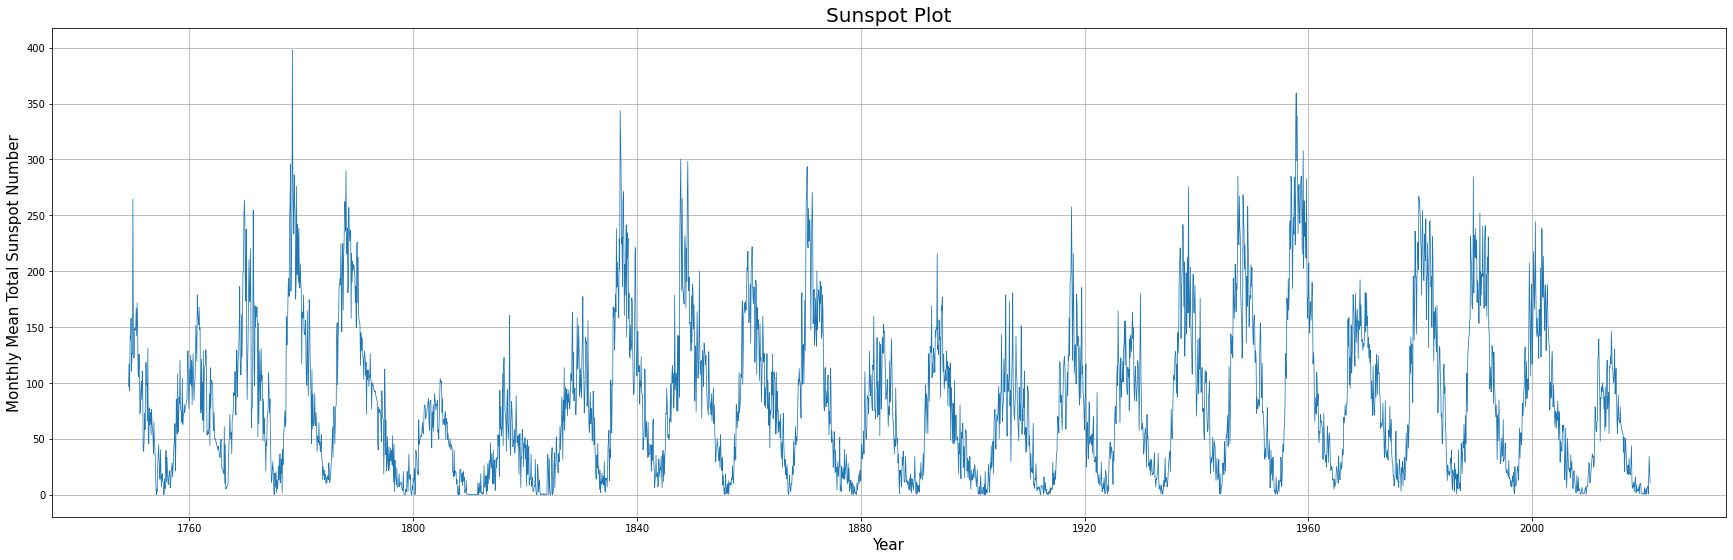

In [ ]:
plt.figure(figsize=(30,9))
plt.plot(date, suns,linewidth=.75)
plt.grid()
plt.title('Sunspot Plot',
          fontsize=20);
plt.xlabel('Year',fontsize=15)
plt.ylabel('Monthly Mean Total Sunspot Number',fontsize=15)

## Modelling

In [ ]:
date = df['Date'].values
suns = df['Monthly Mean Total Sunspot Number'].values

Disini saya akan menggunakan data splitting dengan data test 20%. Dan juga disini shuffle-nya saya nonaktifkan. Karena data time-series adalah data yang berurutan, jadi sangat tidak diperkenankan apabila data yang akan diprediksi bersifat acak.

In [ ]:
#from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(suns, date, test_size = 0.2, shuffle=False)
print("Data Train :", len(x_train))
print("Data Test  :", len(x_test))

Data Train : 2612
Data Test  : 653


Disini saya akan mencari MAE 10% dari data yang saya punya.

In [ ]:
mae = (df['Monthly Mean Total Sunspot Number'].max() - df['Monthly Mean Total Sunspot Number'].min())*0.1
print("Minimum MAE based on 10% data scale :",mae)

Minimum MAE based on 10% data scale : 39.82


Dan disini saya menurunkan lagi nilai MAE minimum dari data scale menjadi 5% dari skala data.

In [ ]:
mae = (df['Monthly Mean Total Sunspot Number'].max() - df['Monthly Mean Total Sunspot Number'].min())*0.05
print("Minimum MAE based on 5% data scale :",mae)

Minimum MAE based on 5% data scale : 19.91


Lalu saya membuat callback, yang dimana apabila mae dan val_mae bernilai 5% ke bawah berdasarkan skala data.

In [ ]:
class forCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<mae and logs.get('val_mae')<mae):
      self.model.stop_training = True
      print("\nGreat! The MAE from training and validation set is already reach < 5% from data scale.")

Callback = forCallback()

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
dtrain = windowed_dataset(x_train, window_size=30, batch_size=100, shuffle_buffer=1000)
dtest = windowed_dataset(x_test, window_size=30, batch_size=100, shuffle_buffer=1000)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=30, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(30, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)])

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, 
                                    momentum=0.9)
model.compile(optimizer = optimizer,
              loss = tf.keras.losses.Huber(),
              metrics = ['mae'])
history = model.fit(
    dtrain,
    validation_data=dtest,
    epochs = 90,
    verbose = 1,
    callbacks=[Callback])

Epoch 1/90
26/26 [==============================] - 6s 89ms/step - loss: 79.0580 - mae: 79.5466 - val_loss: 83.3544 - val_mae: 83.8460
Epoch 2/90
26/26 [==============================] - 2s 60ms/step - loss: 78.7205 - mae: 79.2120 - val_loss: 82.9526 - val_mae: 83.4441
Epoch 3/90
26/26 [==============================] - 2s 61ms/step - loss: 78.3144 - mae: 78.8087 - val_loss: 82.5446 - val_mae: 83.0365
Epoch 4/90
26/26 [==============================] - 2s 61ms/step - loss: 77.8923 - mae: 78.3880 - val_loss: 82.0695 - val_mae: 82.5632
Epoch 5/90
26/26 [==============================] - 2s 59ms/step - loss: 77.3666 - mae: 77.8629 - val_loss: 81.4548 - val_mae: 81.9510
Epoch 6/90
26/26 [==============================] - 2s 61ms/step - loss: 76.6727 - mae: 77.1693 - val_loss: 80.6348 - val_mae: 81.1309
Epoch 7/90
26/26 [==============================] - 2s 61ms/step - loss: 75.7279 - mae: 76.2242 - val_loss: 79.5189 - val_mae: 80.0164
Epoch 8/90
26/26 [==============================] - 2s 

## Visualizing Model Accuracy

Berikut adalah visualisasi plot dari loss dan akurasi model yang saya pakai.

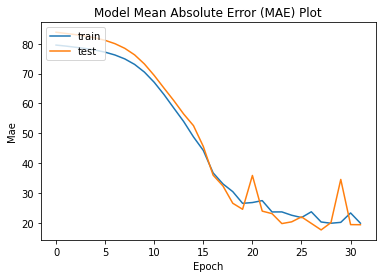

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mean Absolute Error (MAE) Plot')
plt.ylabel('Mae')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

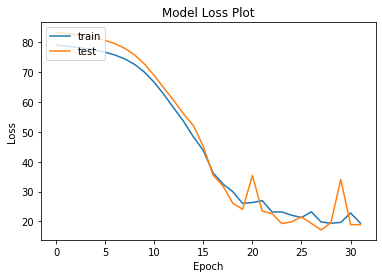

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()